<IPython.core.display.Javascript object>


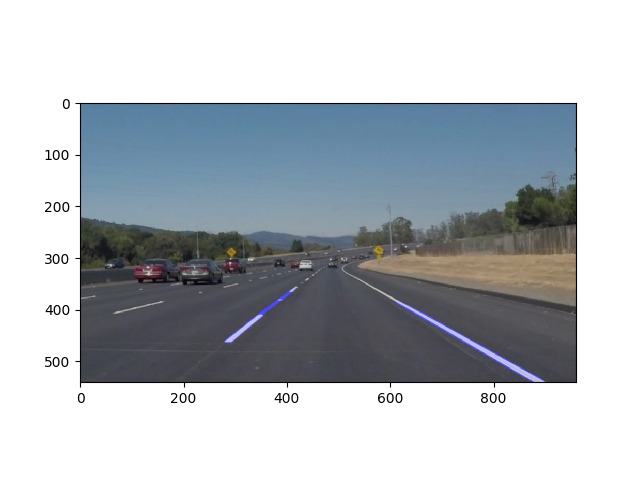

<IPython.core.display.Javascript object>


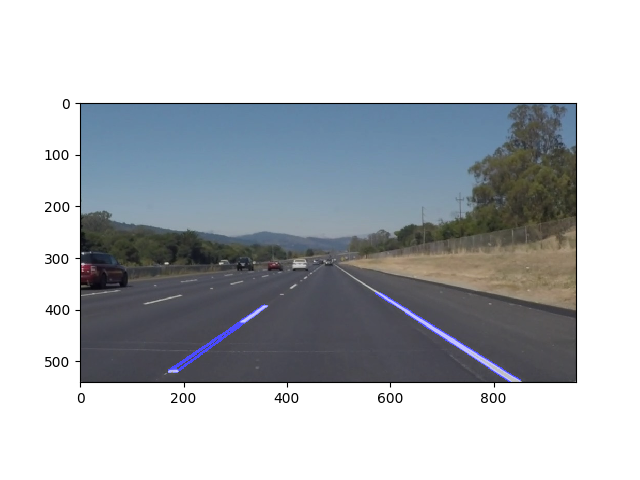

<IPython.core.display.Javascript object>


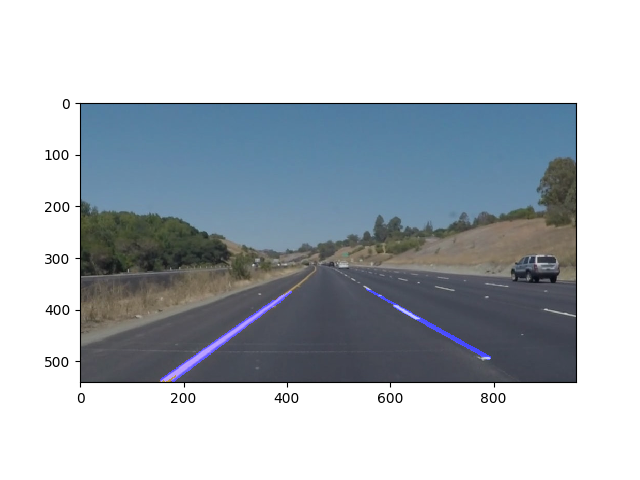

<IPython.core.display.Javascript object>


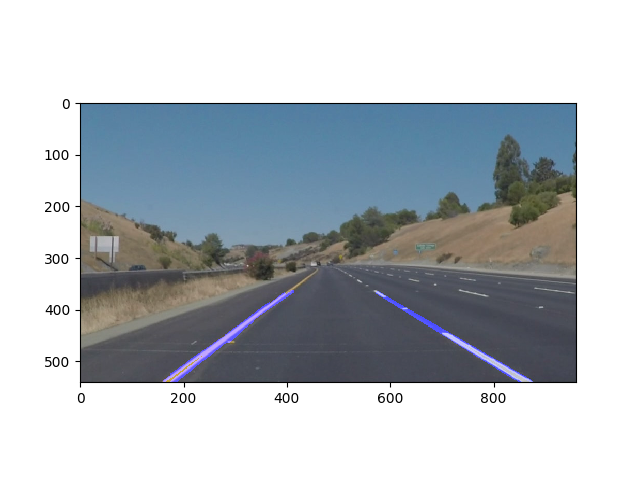

<IPython.core.display.Javascript object>


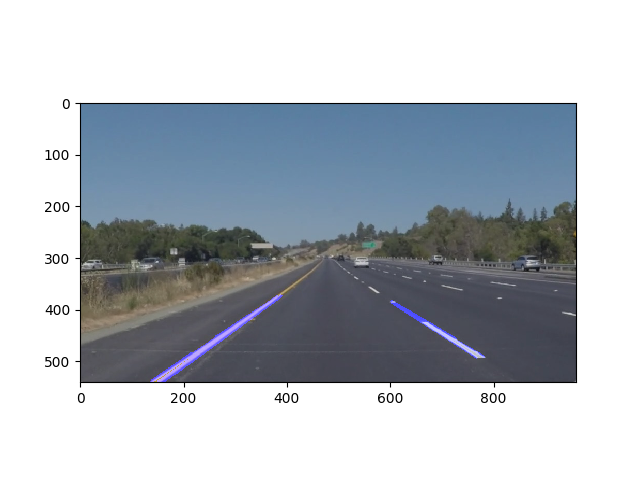

<IPython.core.display.Javascript object>


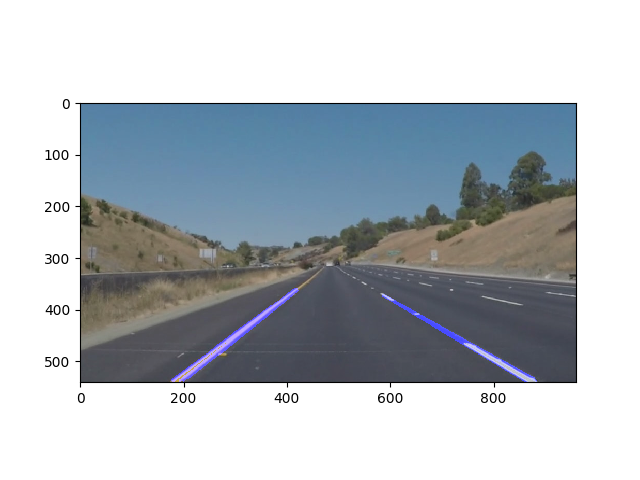

In [8]:
%matplotlib notebook
#lane detection on all images
import numpy as np
import matplotlib.pyplot as plt
import cv2
#vid =cv2.VideoCapture('test_videos/challenge.mp4')
#vid =cv2.VideoCapture('test_videos/solidWhiteRight.mp4')


#cv2.namedWindow('Road View')
#RGB Threshold Parameters
red_val=0
green_val=200
blue_val=200
#HSV Threshold Parameters
Hue=41
Sat=96
Val=41
#Gaussian Blur Parameters
kernel_size=5
low_threshold=50
high_threshold=150
# Hough transform parameters
rho_ = 8
theta_ = (np.pi/180)
threshold_ = 90
min_line_length =1
max_line_gap =150

pic_set=['test_images/solidWhiteCurve.jpg','test_images/solidWhiteRight.jpg','test_images/solidYellowCurve.jpg',
         'test_images/solidYellowCurve2.jpg','test_images/solidYellowLeft.jpg','test_images/whiteCarLaneSwitch.jpg']
for i in range(0,6):

    pic = cv2.imread(pic_set[i])#load image

    line_image= np.copy(pic)*0 #creating a blank to draw lines on

    #image assets
    vid_img=np.copy(pic)
    y_size=vid_img.shape[0]
    x_size=vid_img.shape[1]
    apex=[490,330]
    image_bottomleft=[0,y_size]
    image_bottomright=[x_size,y_size]
    rm=np.array([apex,image_bottomleft,image_bottomright],np.int32)
    rm=rm.reshape((-1,1,2))

    ##################################################################
    ############ RGB Color Based######################################
    ##################################################################

    rgb_threshold=[red_val,green_val,blue_val]
    pic_m = cv2.fillPoly(pic, [rm], (0, 0, 0))
    pic_m = cv2.bitwise_and(~pic, vid_img)

    hsv_img=np.copy(pic_m)#hasv image copy from masked image

    threshold=(pic_m[:,:,0]<rgb_threshold[0])|(pic_m[:,:,1]<rgb_threshold[1])|(pic_m[:,:,2]<rgb_threshold[2])
    pic_m[threshold]=[0,0,0]
    pic_m_gray=cv2.cvtColor(pic_m,cv2.COLOR_RGB2GRAY)
    pic_blur=cv2.GaussianBlur(pic_m_gray,(kernel_size,kernel_size),0)
    pic_edge=cv2.Canny(pic_blur,low_threshold,high_threshold)
    # Run 1Hough on edge detected image
    lines = cv2.HoughLinesP(pic_edge, rho_, theta_, threshold_,np.array([]),min_line_length,max_line_gap)

    try:
        # Iterate over the output "lines" and draw lines on the blank
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 3)
    except:
        pass

    ##################################################################
    ############ HSV Color Based######################################
    ##################################################################
    hsv_threshold=[Hue,Sat,Val]
    hsv_img=cv2.cvtColor(hsv_img,cv2.COLOR_RGB2HSV)
    threshold_1=(hsv_img[:,:,0]<hsv_threshold[0])|(hsv_img[:,:,1]<hsv_threshold[1])|(hsv_img[:,:,2]<hsv_threshold[2])
    hsv_img[threshold_1]=[0,0,0]
    hsv_img=cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB)
    hsv_gray=cv2.cvtColor(hsv_img,cv2.COLOR_RGB2GRAY)
    hsv_blur=cv2.GaussianBlur(hsv_gray,(kernel_size,kernel_size),0)
    hsv_edge=cv2.Canny(hsv_blur,low_threshold,high_threshold)

    # Run 1Hough on edge detected image
    hsv_lines = cv2.HoughLinesP(hsv_edge, rho_, theta_, threshold_,np.array([]),min_line_length,max_line_gap)

    try:
        # Iterate over the output "lines" and draw lines on the blank
        #p1=hsv_lines[0, 0, 0:2]
        #p2=hsv_lines[0, 0, 2:4]
        #print "(X1,Y1):",p1
        #print "(X2,Y2):",p2
        #print "slop:", (p2[1]-p1[1])/(p2[0]-p1[0])


        for line in hsv_lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 3)
    except:
        pass

    # Draw the lines on the edge image

    combo=cv2.addWeighted(vid_img,0.8,line_image,1,0)#draw detection lines on orignal image
    combo=cv2.cvtColor(combo,cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(combo)
    plt.show()
    #while cv2.waitKey(1)==-1
        #cv2.imshow('Road View',combo)
    #cv2.destroyWindow('Road View')


In [3]:
%matplotlib notebook
#lane detection on videos
import numpy as np
import matplotlib.pyplot as plt
import cv2

vid_set=['test_videos/solidWhiteRight.mp4','test_videos/solidYellowLeft.mp4']

for i in range(0,2):
    vid =cv2.VideoCapture(vid_set[i])#load video
    cv2.namedWindow('Road View')
    #RGB Threshold Parameters
    red_val=190
    green_val=190
    blue_val=190

    #HSV Threshold Parameters
    Hue=41
    Sat=96
    Val=41
    #Gaussian Blur Parameters
    kernel_size=5
    low_threshold=50
    high_threshold=150
    # Hough transform parameters
    rho_ = 1
    theta_ = (np.pi/180)
    threshold_ = 1#15
    min_line_length =70
    max_line_gap =50#20



    bool,pic = vid.read()#read a frame from video
    line_image= np.copy(pic)*0 #creating a blank to draw lines on
    #image assets
    vid_img=np.copy(pic)
    y_size=vid_img.shape[0]
    x_size=vid_img.shape[1]
    apex=[490,308]
    image_bottomleft=[0,y_size]
    image_bottomright=[x_size,y_size]
    rm=np.array([apex,image_bottomleft,image_bottomright],np.int32)
    rm=rm.reshape((-1,1,2))

    ##################################################################
    ############ RGB Color Based######################################
    ##################################################################

    rgb_threshold=[red_val,green_val,blue_val]
    pic_m = cv2.fillPoly(pic, [rm], (0, 0, 0))
    pic_m = cv2.bitwise_and(~pic, vid_img)

    hsv_img=np.copy(pic_m)#hsv image copy from masked image

    threshold=(pic_m[:,:,0]<rgb_threshold[0])|(pic_m[:,:,1]<rgb_threshold[1])|(pic_m[:,:,2]<rgb_threshold[2])#apply threshold
    pic_m[threshold]=[0,0,0]#Converting all pixels which are lower then threshold value
    pic_m_gray=cv2.cvtColor(pic_m,cv2.COLOR_RGB2GRAY)#convert rgb image to gray
    pic_blur=cv2.GaussianBlur(pic_m_gray,(kernel_size,kernel_size),0)#apply gaussian blur
    pic_edge=cv2.Canny(pic_blur,low_threshold,high_threshold)#apply canny edge detection
    # Run 1Hough on edge detected image
    lines = cv2.HoughLinesP(pic_edge, rho_, theta_, threshold_,np.array([]),min_line_length,max_line_gap) #hough transform

    try:
        # Iterate over the output "lines" and draw lines on the blank
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    except:
        pass

    ##################################################################
    ############ HSV Color Based######################################
    ##################################################################
    hsv_threshold=[Hue,Sat,Val]
    hsv_img=cv2.cvtColor(hsv_img,cv2.COLOR_RGB2HSV)
    threshold_1=(hsv_img[:,:,0]<hsv_threshold[0])|(hsv_img[:,:,1]<hsv_threshold[1])|(hsv_img[:,:,2]<hsv_threshold[2]) #hsv threshold
    hsv_img[threshold_1]=[0,0,0] #Converting all pixels which are lower then threshold value
    hsv_img=cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB) #convert hsv image to rgb
    hsv_gray=cv2.cvtColor(hsv_img,cv2.COLOR_RGB2GRAY) #convert rgb image to gray
    hsv_blur=cv2.GaussianBlur(hsv_gray,(kernel_size,kernel_size),0) #apply gaussian blur
    hsv_edge=cv2.Canny(hsv_blur,low_threshold,high_threshold) #apply canny edge detection

    # Run 1Hough on edge detected image
    hsv_lines = cv2.HoughLinesP(hsv_edge, rho_, theta_, threshold_,np.array([]),min_line_length,max_line_gap)

    try:
        # Iterate over the output "lines" and draw lines on the blank
        for line in hsv_lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    except:
        pass

    # Draw the lines on the edge image
    combo=cv2.addWeighted(vid_img,0.8,line_image,1,0)#draw detection lines on orignal image
    #########################################################################
    ######################### Video View#####################################
    #########################################################################

    while bool==True and cv2.waitKey(1)==-1:
        cv2.imshow('Road View', combo)
        bool,pic=vid.read() #reading a frame
        if not bool:
            break
        line_image = np.copy(pic) * 0  # creating a blank to draw lines on
        vid_img = np.copy(pic) #orignal image copy to draw lines on it
        pic_m = cv2.fillPoly(pic, [rm], (0, 0, 0))
        pic_m = cv2.bitwise_and(~pic, vid_img)
        hsv_img = np.copy(pic_m) # hsv image copy
        threshold = (pic_m[:, :, 0] < rgb_threshold[0]) | (pic_m[:, :, 1] < rgb_threshold[1]) | (pic_m[:, :, 2] < rgb_threshold[2]) #rgb Threshold
        pic_m[threshold] = [0, 0, 0] #conver all colors to black other then white
        pic_m_gray = cv2.cvtColor(pic_m, cv2.COLOR_RGB2GRAY) #convert image to gray
        pic_blur = cv2.GaussianBlur(pic_m_gray, (kernel_size, kernel_size), 0) #applying gaussian blur
        pic_edge = cv2.Canny(pic_blur, low_threshold, high_threshold) #applying canny edge detection
        # Run 1Hough on edge detected image
        lines = cv2.HoughLinesP(pic_edge, rho_, theta_, threshold_, np.array([]), min_line_length, max_line_gap)
        try:
            # Iterate over the output "lines" and draw lines on the blank
            for line in lines:
                for x1, y1, x2, y2 in line:
                    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
        except:
            pass

        #Hsv based filtering to detect yellow lane
        hsv_threshold = [Hue, Sat, Val]
        hsv_img = cv2.cvtColor(hsv_img, cv2.COLOR_RGB2HSV)#convert image to hsv
        threshold_1 = (hsv_img[:, :, 0] < hsv_threshold[0]) | (hsv_img[:, :, 1] < hsv_threshold[1]) | (hsv_img[:, :, 2] < hsv_threshold[2])
        hsv_img[threshold_1] = [0, 0, 0]
        hsv_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB) #convert hsv image to rgb
        hsv_gray = cv2.cvtColor(hsv_img, cv2.COLOR_RGB2GRAY) #convert rgb image to gray
        hsv_blur = cv2.GaussianBlur(hsv_gray, (kernel_size, kernel_size), 0)
        hsv_edge = cv2.Canny(hsv_blur, low_threshold, high_threshold)

        # Run 1Hough on edge detected image
        hsv_lines = cv2.HoughLinesP(hsv_edge, rho_, theta_, threshold_, np.array([]), min_line_length, max_line_gap)

        try:
            # Iterate over the output "lines" and draw lines on the blank
            for line in hsv_lines:
                for x1, y1, x2, y2 in line:
                    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
        except:
            pass
        # Create a "color" binary image to combine with line image
        hsv_color_edges = np.dstack((hsv_edge, hsv_edge, hsv_edge))

        # Draw the lines on the edge image
        #hsv_combo = cv2.addWeighted(hsv_color_edges, 0.8, hsv_line_image, 1, 0)

        combo=cv2.addWeighted(vid_img,0.8,line_image,1,0)#draw detection lines on orignal image


    cv2.destroyWindow('Road View')


TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [ ]:
#With above code video frame is not loading in ipython notebook, Output of above code is stored in output_videos.
#But code is working in any other IDE.


In [7]:
### lane detection on challenge.mp4
import numpy as np
import cv2
import matplotlib.pyplot as plt

#vid =cv2.VideoCapture('test_videos/challenge.mp4')
#vid =cv2.VideoCapture('test_videos/solidWhiteRight.mp4')
vid =cv2.VideoCapture('test_videos/challenge.mp4')#load video
cv2.namedWindow('Road View')

#RGB Threshold Parameters
red_val=0
green_val=200
blue_val=200
#HSV Threshold Parameters
Hue=41
Sat=96
Val=41
#Gaussian Blur Parameters
kernel_size=5
low_threshold=50
high_threshold=150
# Hough transform parameters
rho_ = 1
theta_ = (np.pi/180)
threshold_ = 1#15
min_line_length =50
max_line_gap =50#20



bool,pic = vid.read()#read a frame from video
print (bool)

line_image= np.copy(pic)*0 #creating a blank to draw lines on

#image assets
vid_img=np.copy(pic)
y_size=vid_img.shape[0]
x_size=vid_img.shape[1]
apex=[690,435]
image_bottomleft=[0,y_size]
image_bottomright=[x_size,y_size]
rm=np.array([apex,image_bottomleft,image_bottomright],np.int32)
rm=rm.reshape((-1,1,2))

##################################################################
############ RGB Color Based######################################
##################################################################

rgb_threshold=[red_val,green_val,blue_val]
pic_m = cv2.fillPoly(pic, [rm], (0, 0, 0))
pic_m = cv2.bitwise_and(~pic, vid_img)

hsv_img=np.copy(pic_m)#hsv image copy from masked image

threshold=(pic_m[:,:,0]<rgb_threshold[0])|(pic_m[:,:,1]<rgb_threshold[1])|(pic_m[:,:,2]<rgb_threshold[2])#apply threshold
pic_m[threshold]=[0,0,0]#Converting all pixels which are lower then threshold value
pic_m_gray=cv2.cvtColor(pic_m,cv2.COLOR_RGB2GRAY)#convert rgb image to gray
pic_blur=cv2.GaussianBlur(pic_m_gray,(kernel_size,kernel_size),0)#apply gaussian blur
pic_edge=cv2.Canny(pic_blur,low_threshold,high_threshold)#apply canny edge detection
# Run 1Hough on edge detected image
lines = cv2.HoughLinesP(pic_edge, rho_, theta_, threshold_,np.array([]),min_line_length,max_line_gap) #hough transform

try:
    # Iterate over the output "lines" and draw lines on the blank
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
except:
    pass

##################################################################
############ HSV Color Based######################################
##################################################################
hsv_threshold=[Hue,Sat,Val]
hsv_img=cv2.cvtColor(hsv_img,cv2.COLOR_RGB2HSV)
threshold_1=(hsv_img[:,:,0]<hsv_threshold[0])|(hsv_img[:,:,1]<hsv_threshold[1])|(hsv_img[:,:,2]<hsv_threshold[2]) #hsv threshold
hsv_img[threshold_1]=[0,0,0] #Converting all pixels which are lower then threshold value
hsv_img=cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB) #convert hsv image to rgb
hsv_gray=cv2.cvtColor(hsv_img,cv2.COLOR_RGB2GRAY) #convert rgb image to gray
hsv_blur=cv2.GaussianBlur(hsv_gray,(kernel_size,kernel_size),0) #apply gaussian blur
hsv_edge=cv2.Canny(hsv_blur,low_threshold,high_threshold) #apply canny edge detection

# Run 1Hough on edge detected image
hsv_lines = cv2.HoughLinesP(hsv_edge, rho_, theta_, threshold_,np.array([]),min_line_length,max_line_gap)

try:
    # Iterate over the output "lines" and draw lines on the blank
    for line in hsv_lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
except:
    pass

# Draw the lines on the edge image
combo=cv2.addWeighted(vid_img,0.8,line_image,1,0)#draw detection lines on orignal image
#########################################################################
######################### Video View#####################################
#########################################################################

while bool and cv2.waitKey(1)==-1:
    cv2.imshow('Road View', combo)
    bool,pic=vid.read() #reading a frame
    if not bool:
        break
    line_image = np.copy(pic) * 0  # creating a blank to draw lines on
    vid_img = np.copy(pic) #orignal image copy to draw lines on it
    pic_m = cv2.fillPoly(pic, [rm], (0, 0, 0))
    pic_m = cv2.bitwise_and(~pic, vid_img)
    hsv_img = np.copy(pic_m) # hsv image copy
    threshold = (pic_m[:, :, 0] < rgb_threshold[0]) | (pic_m[:, :, 1] < rgb_threshold[1]) | (pic_m[:, :, 2] < rgb_threshold[2]) #rgb Threshold
    pic_m[threshold] = [0, 0, 0] #conver all colors to black other then white
    pic_m_gray = cv2.cvtColor(pic_m, cv2.COLOR_RGB2GRAY) #convert image to gray
    pic_blur = cv2.GaussianBlur(pic_m_gray, (kernel_size, kernel_size), 0) #applying gaussian blur
    pic_edge = cv2.Canny(pic_blur, low_threshold, high_threshold) #applying canny edge detection
    # Run 1Hough on edge detected image
    lines = cv2.HoughLinesP(pic_edge, rho_, theta_, threshold_, np.array([]), min_line_length, max_line_gap)
    try:
        # Iterate over the output "lines" and draw lines on the blank
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    except:
        pass

    #Hsv based filtering to detect yellow lane
    hsv_threshold = [Hue, Sat, Val]
    hsv_img = cv2.cvtColor(hsv_img, cv2.COLOR_RGB2HSV)#convert image to hsv
    threshold_1 = (hsv_img[:, :, 0] < hsv_threshold[0]) | (hsv_img[:, :, 1] < hsv_threshold[1]) | (hsv_img[:, :, 2] < hsv_threshold[2])
    hsv_img[threshold_1] = [0, 0, 0]
    hsv_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB) #convert hsv image to rgb
    hsv_gray = cv2.cvtColor(hsv_img, cv2.COLOR_RGB2GRAY) #convert rgb image to gray
    hsv_blur = cv2.GaussianBlur(hsv_gray, (kernel_size, kernel_size), 0)
    hsv_edge = cv2.Canny(hsv_blur, low_threshold, high_threshold)

    # Run 1Hough on edge detected image
    hsv_lines = cv2.HoughLinesP(hsv_edge, rho_, theta_, threshold_, np.array([]), min_line_length, max_line_gap)

    try:
        # Iterate over the output "lines" and draw lines on the blank
        for line in hsv_lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    except:
        pass
    # Create a "color" binary image to combine with line image
    hsv_color_edges = np.dstack((hsv_edge, hsv_edge, hsv_edge))

    # Draw the lines on the edge image
    #hsv_combo = cv2.addWeighted(hsv_color_edges, 0.8, hsv_line_image, 1, 0)

    combo=cv2.addWeighted(vid_img,0.8,line_image,1,0)#draw detection lines on orignal image


cv2.destroyWindow('Road View')


False


TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [ ]:
#with above video frame is not loading in ipython notebook, Output of above code is stored in output_videos.
#But code is working in any other IDE.